In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [86]:
def V(r, f = 1e-1):
    """
    Coulomb potential between two unit charges of same sign in units of Hartree, 
    if r is in bohr radii.  The parameter smoothes the divergence of the potential in 1D."""
    return 1 / (f + abs(r))

In [87]:
def make_H(grid):
    """
    Create a Hamiltonian that describes a proton and an electron.
    """
    
    dx = grid[1] - grid[0]
    size = len(grid)
    
    x1, x2 = np.meshgrid(grid, grid)
    v = -V(x1 - x2)
    
    units = 0.5 # Ha = h_bar²/2m_e / r_0²
    o = units / dx**2 * np.ones(size ** 2)
    m_proton = 2000 # roughly in units of electron mass
    H = np.diag((2 + 2 / m_proton) * o + v.flat, 0) + \
        - np.diag(o[1:], -1) \
        - np.diag(o[1:], +1) \
        - np.diag(o[n:] / m_proton, -n) \
        - np.diag(o[n:] / m_proton, +n)
    
    for i in range(n - 1, n**2 - 1, n):
        H[i, i + 1] = 0
        H[i + 1, i] = 0
    
    return H

In [88]:
def solve(H):
    e, v = LA.eig(H)
    v = v[:, np.argsort(e)]
    e = e[np.argsort(e)]
    return e, v

In [89]:
def solve2d(H):
    e, v = solve(H)
    n = int(np.sqrt(len(e)))
    return e, v.T.reshape(-1, n, n)

In [109]:
def edens(v):
    return abs(v**2).sum(axis = -2)

def pdens(v):
    return abs(v**2).sum(axis = -1)

In [90]:
n = 40
r = np.linspace(-3, 3, n)
H = make_H(r)

In [91]:
e, v = solve2d(H)

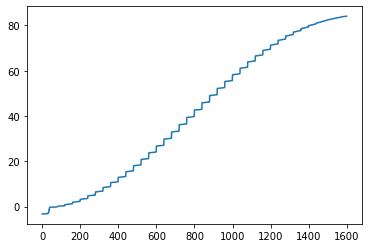

In [92]:
plt.plot(e)

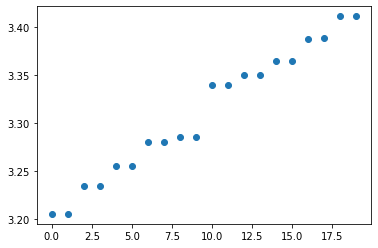

In [140]:
plt.plot(e[5*n:5*n+20], "o")

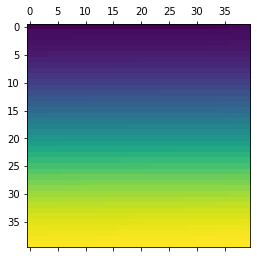

In [94]:
plt.matshow(e.reshape(n, n).real)

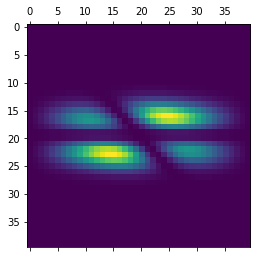

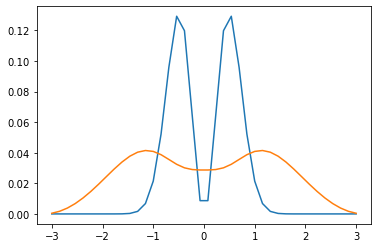

In [158]:
i = n + 1
plt.matshow(abs(v[i])**2)
plt.figure()
plt.plot(r, pdens(v[i]), r, edens(v[i]))

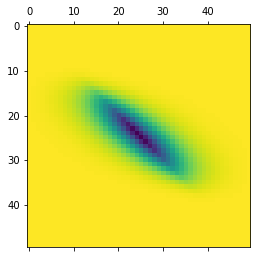

In [20]:
plt.matshow(v[0].real)plt.matshow(v[0].real)

## Exercise 1

Create a Hamiltonian for two electrons and a doubly charged ion in the center of the grid!  Your grid should have around ~50 points.  Examine the diagonal of the Hamiltonian with the command
```python
plt.matshow(np.diag(H).reshape(n, n))
```
(where `H` is the variable with Hamiltonian you created and `n` your grid size) and explain the features of the picture in terms of the parts of our system (i.e. one electron and one proton)!  What causes the positive and negative contributions to the Hamiltonian?

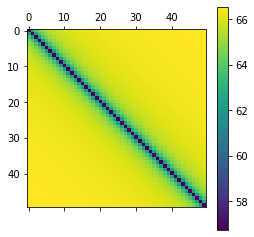

In [43]:
plt.matshow(np.diag(H).reshape(n, n))
plt.colorbar()

## Exercise 2

Solve the Hamiltonian and examine the energy.  Are there qualitative differences to the one you obtained for two electrons?  Can you understand the energy in terms of systems we've discussed so far?

## Exercise 3

Which parts of the dispersion are due the electron and which are due to the proton?  Write two functions that take a full wavefunction and return the probability amplitude of the electron and proton respectively.  Can you understand the order of the eigenstates of the full system in terms of the electronic and protonic excitations?

## Exercise 4

Implement the Born-Oppenheimer approximation by solving the one particle electronic Schrödinger equation for each possible position of the proton on your grid.  This gives you the electronic potential in which the proton moves, use it to solve the one particle Schrödinger equation for the proton!  Combine the wavefunctions from both solutions to the full wavefunctions with a product ansatz and compare to the exact solution!

## Bonus

Compute the average proton position and its variance for each electronic excitation!